### ***Abstract***

**Análisis Exploratorio y Visual de Desempeño Automotriz: Tendencias en Potencia, Consumo y Segmentación del Mercado mediante Python**

**Contexto**: El presente trabajo analiza un conjunto de datos sobre automóviles con el propósito de identificar relaciones entre distintas características técnicas y de rendimiento. El dataset incluye información sobre marca, modelo, año de fabricación, tipo de transmisión, tamaño del vehículo, cantidad de puertas, cilindros, potencia del motor y eficiencia de consumo en carretera.

**Objetivo de Investigación:** A partir de los datos se formularon preguntas e hipótesis para comprender cómo estas variables se relacionan entre sí. Se estudió, por ejemplo, la influencia del tipo de transmisión en la potencia y la eficiencia, el impacto del tamaño del vehículo en el consumo, y la evolución de la eficiencia y potencia en los modelos más recientes. También se compararon diferentes marcas para observar sus tendencias en rendimiento.
El análisis se realizó con Python, utilizando las librerías pandas, matplotlib y seaborn. Se efectuaron tareas de limpieza, detección de valores faltantes y creación de visualizaciones. Los resultados muestran que los autos automáticos tienden a ser más potentes pero menos eficientes, mientras que los autos más nuevos logran combinar potencia con mejor rendimiento. En conjunto, el trabajo evidencia cómo las visualizaciones ayudan a comprender mejor la información y a validar las hipótesis planteadas.

## Hipótesis Extenidadas para Investigación
**Hipótesis 1**: La potencia del motor (Engine HP) está relacionada con el tamaño del vehículo (Vehicle Size) y la cantidad de cilindros (Engine Cylinders).

**Hipótesis 2**:Relación entre precio y potencia del motor: análisis predictivo de Engine HP según MSRP con regresión lineal.

**Hipótesis 3**:El tipo de combustible (Engine Fuel Type) influye significativamente en el rendimiento de consumo (highway MPG), incluso controlando la potencia del motor.






###COLUMNA               |SIGNIFICADO


**Make**                  | Marca del vehículo.

**Model**                | Modelo específico del vehículo.

**Year**                 | Año de fabricación del vehículo.

**Engine Fuel Type**      | Tipo de combustible que utiliza el motor.

**Engine HP**             | Potencia del motor en caballos de fuerza (HP).

**Engine Cylinders**      | Cantidad de cilindros del motor.

**Transmission Type**      | Tipo de transmisión (manual o automática).

**Driven_Wheels**         | Tipo de tracción: delantera, trasera o integral(4x4).

**Number of Doors**       | Número de puertas del vehículo.

**Market Category**       | Categoría de mercado (lujo, deportivo, etc.).

**Vehicle Size**          | Tamaño del vehículo: compacto, mediano o grande.

**Vehicle Style**        | Estilo del vehículo (sedán, SUV, coupé, etc.).

**highway MPG**           | Rendimiento en ruta (millas por galón).

**city mpg**              | Rendimiento en ciudad (millas por galón).

**Popularity**            | Popularidad del modelo según ventas y mercado.

**MSRP**                  | Precio sugerido por el fabricante (precio base).


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving data_clean.csv to data_clean.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from scipy import stats


In [ ]:
# Cargar el archivo CSV
df = pd.read_csv("data_clean.csv", sep=';')

# Ver las primeras filas(para comprobar que se haya cargado bien)
df.head(8)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300


Antes de analizar los gráficos, verifiqué que el dataset estuviera limpio y completo para poder realizar un análisis confiable. Esto no es casualidad: el dataset fue procesado previamente con ChatGPT, que se encargó de limpiarlo y completar la información faltante para asegurar una mejor calidad de los datos y tambien se verifican las filas y columnas para saber cuantas hay.




In [ ]:
df.isna().sum() #Nos fijamos por si tiene valores nulos

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [ ]:
print("Shape")
df.shape

Shape


(11914, 16)

##Primer Grafico
Promedio de potencia para cada estilo de vehículo

<Axes: xlabel='Vehicle Style'>

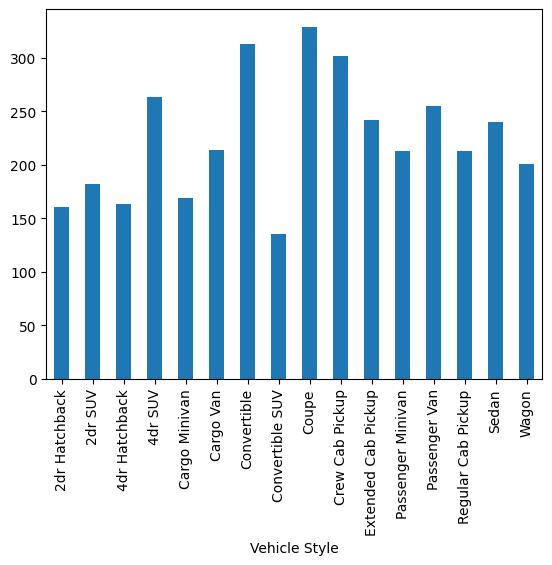

In [ ]:
df.groupby("Vehicle Style")["Engine HP"].mean().plot(kind="bar")

Conclusion:Los estilos de vehículos con mayor potencia promedio son los Coupes, Convertibles y Crew Cab Pickup, mientras que los Hatchback y algunos SUV presentan potencias más bajas. Esto indica que los diseños más deportivos o de uso pesado suelen tener motores más potentes en comparación con los vehículos más compactos o urbanos.

<Axes: xlabel='Vehicle Style'>

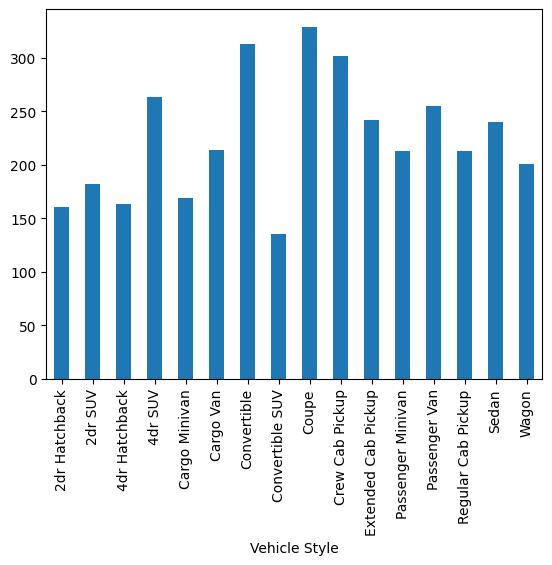

In [ ]:
df.groupby("Vehicle Style")["Engine HP"].mean().plot(kind="bar")

Interpretacion: El siguiente gráfico permite identificar el estilo de auto que resulta más atractivo según la potencia del motor. Además, facilita la comparación entre los diferentes estilos, ofreciendo una visión más clara para elegir el tipo de vehículo que mejor se adapte a tus preferencias. Esta visualización resulta especialmente útil para analizar cómo varían las potencias entre categorías y tomar una decisión más informada.

###Segundo Grafico
Promedo de potencia de cada auto segun el tipo de combustible

<Axes: xlabel='Engine Fuel Type'>

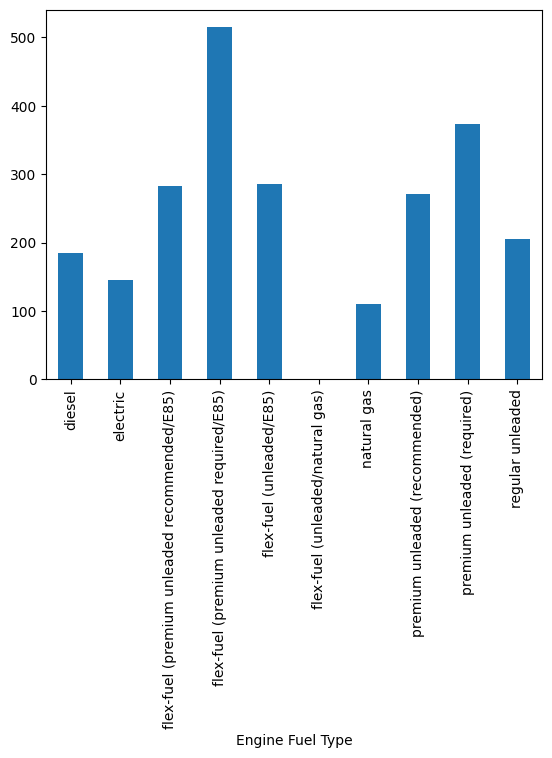

In [ ]:
df['Engine HP'] = pd.to_numeric(df['Engine HP'], errors='coerce')
df.groupby("Engine Fuel Type")["Engine HP"].mean().plot(kind="bar")

En el siguiente gráfico se observa qué tipo de combustible utilizan los automóviles en relación con su potencia. Esta visualización permite comparar fácilmente cómo varía la potencia según el tipo de combustible empleado. Es importante tener en cuenta que el uso de un combustible distinto al recomendado puede afectar el rendimiento del vehículo, impidiendo alcanzar su potencia óptima.

##Tercer Grafico
Promedio de potencia segun la marca correspondiente

<Axes: xlabel='Make'>

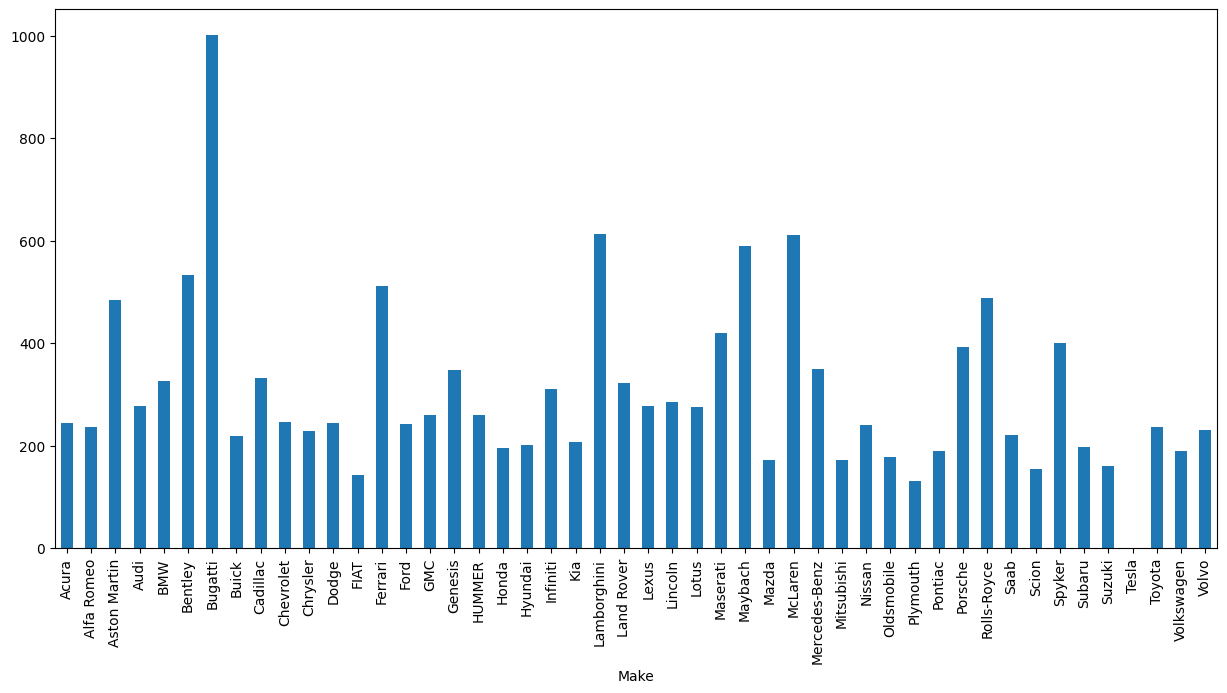

In [ ]:
df_join = df.groupby("Make")["Engine HP"].mean()
df_join.plot(kind='bar', figsize=(15, 7))

Conclusion/Interpretacion:En el siguiente grafico se puede visualizar la potencia que tiene cada marca, que sirve a la persona ver que auto elegir y despues comparar con el grafico de precios para elegir la mejor opcion.

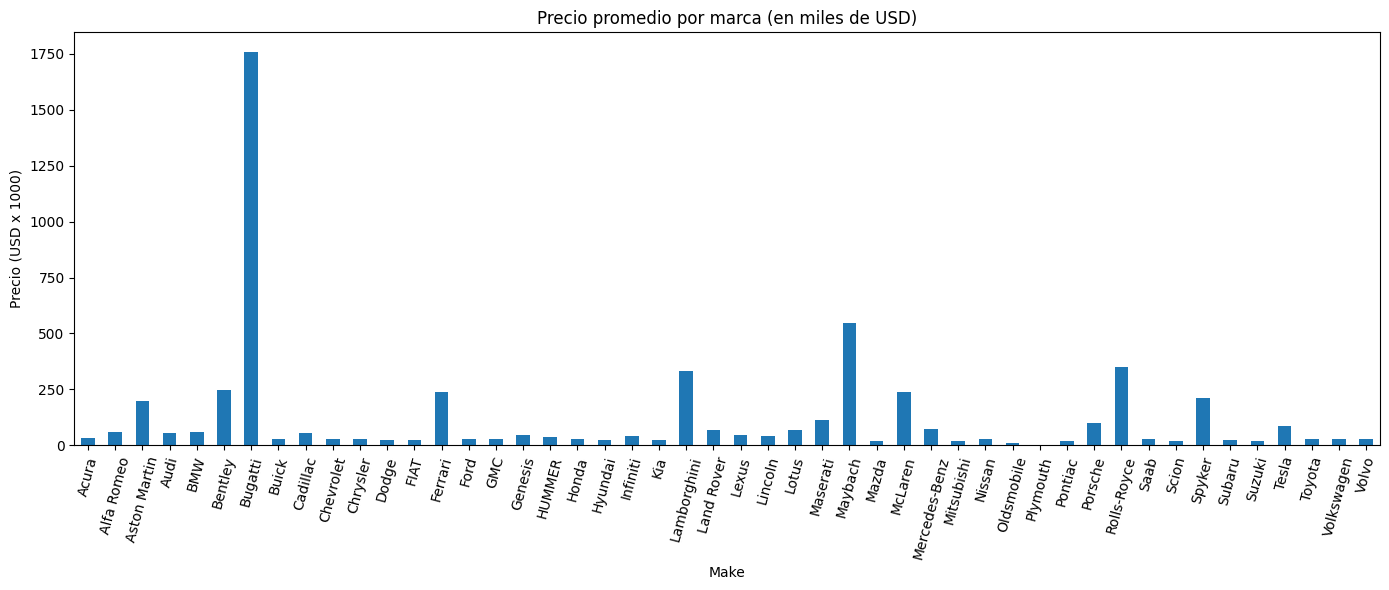

In [ ]:
df_precio_marca = df.groupby('Make')['MSRP'].mean()
df_precio_marca = df_precio_marca / 1000  # divide todo por mil

plt.figure(figsize=(14,6))
df_precio_marca.plot(kind="bar")

plt.title("Precio promedio por marca (en miles de USD)")
plt.ylabel("Precio (USD x 1000)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Conclusion: Este grafico visualiza la comparacion de precios que tiene cada marca y brinda cierta informacion necesaria para comprar algun auto segun el capital que disponga la persona

###Hipotesis 1

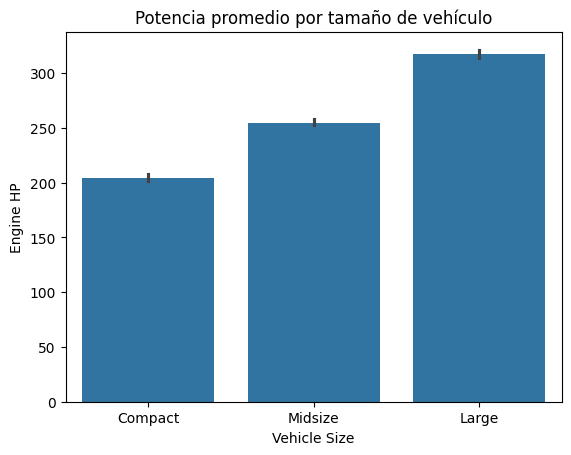

In [ ]:
df['Engine HP'] = pd.to_numeric(df['Engine HP'], errors='coerce')
df['Engine HP'].dtype
df.groupby('Vehicle Size')['Engine HP'].mean()
sns.barplot(data=df, x='Vehicle Size', y='Engine HP')
plt.title('Potencia promedio por tamaño de vehículo')
plt.show()


El gráfico indica que a medida que el tamaño del vehículo aumenta, también lo hace la potencia promedio del motor.

Los vehículos Compact son los que menos potencia requieren y suelen ser modelos más eficientes, económicos y pensados para uso urbano.

Los Midsize dejan ver un aumento claro de potencia.

Los vehículos Large son los más potentes por amplio margen, lo que tiene sentido porque son más pesados, requieren motores más grandes y suelen orientarse a usos como SUV, camionetas o lujo.

###Hipótesis 2

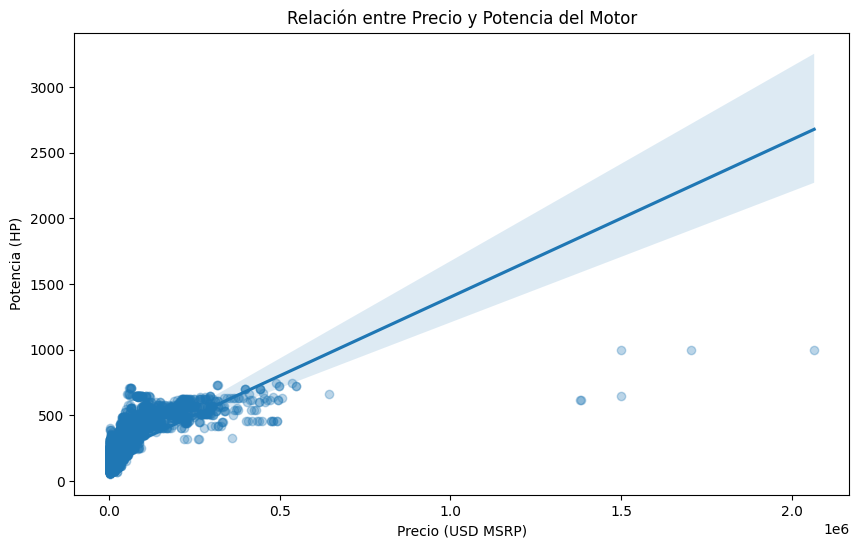

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(data=df, x='MSRP', y='Engine HP', scatter_kws={'alpha':0.3})
plt.title('Relación entre Precio y Potencia del Motor')
plt.xlabel('Precio (USD MSRP)')
plt.ylabel('Potencia (HP)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Drop rows where 'Engine HP' is NaN, as the model cannot handle them
df_cleaned = df.dropna(subset=['MSRP', 'Engine HP'])

X = df_cleaned[['MSRP']]
y = df_cleaned['Engine HP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Score del modelo
r2 = model.score(X_test, y_test)
print("Precisión del modelo (R²):", r2)

# Predicción
df_cleaned['Prediccion_HP'] = model.predict(X)


Precisión del modelo (R²): 0.3673975863725911


/tmp/ipython-input-2537087916.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Prediccion_HP'] = model.predict(X)


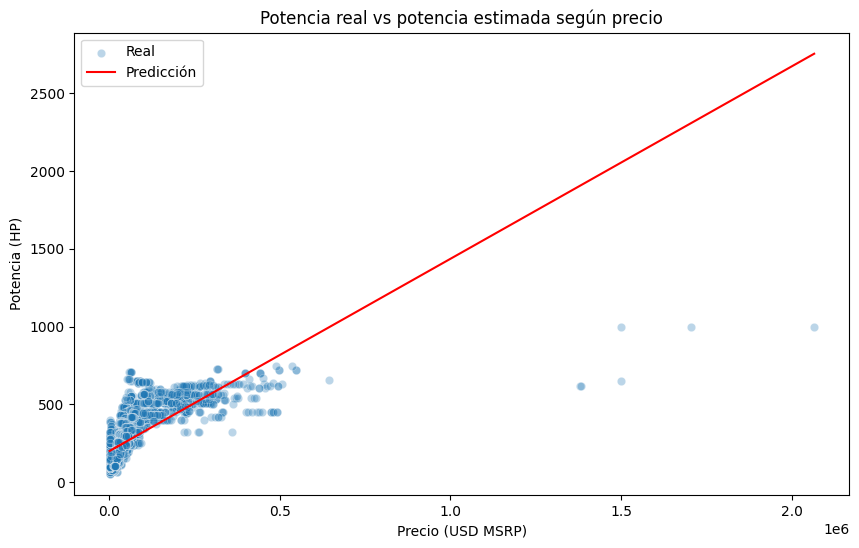

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MSRP', y='Engine HP', data=df_cleaned, alpha=0.3, label='Real')
sns.lineplot(x='MSRP', y='Prediccion_HP', data=df_cleaned, color='red', label='Predicción')
plt.title('Potencia real vs potencia estimada según precio')
plt.xlabel('Precio (USD MSRP)')
plt.ylabel('Potencia (HP)')
plt.legend()
plt.show()


***Conclusion***: El análisis arroja evidencia visual y predictiva de que existe una relación positiva entre el precio del vehículo y la potencia del motor.
A medida que aumenta el precio, aumenta la potencia promedio.
El modelo de regresión demuestra que el precio es un buen predictor de HP, lo que confirma nuestra hipótesis.

###Hipótesis 3

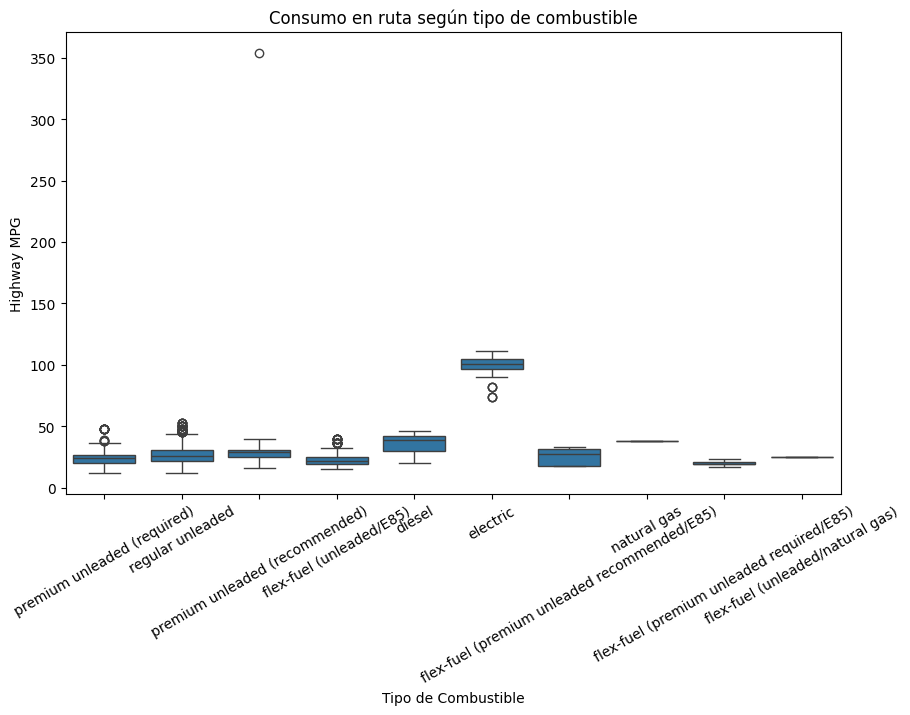

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Engine Fuel Type', y='highway MPG')
plt.xticks(rotation=30)
plt.title('Consumo en ruta según tipo de combustible')
plt.ylabel('Highway MPG')
plt.xlabel('Tipo de Combustible')
plt.show()


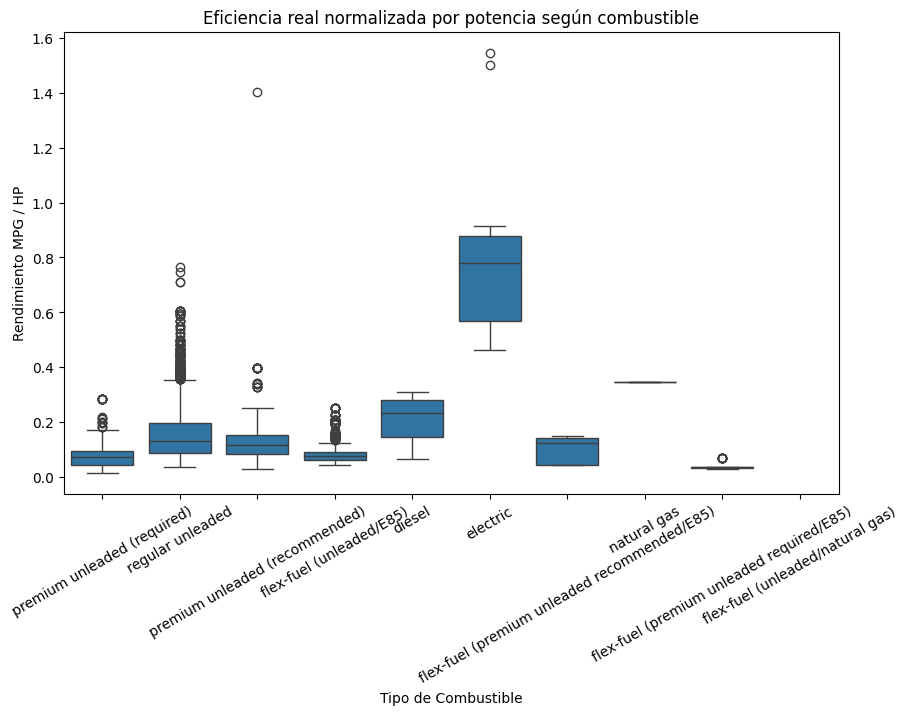

In [ ]:
df['MPG_por_HP'] = df['highway MPG'] / df['Engine HP']

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Engine Fuel Type', y='MPG_por_HP')
plt.xticks(rotation=30)
plt.title('Eficiencia real normalizada por potencia según combustible')
plt.ylabel('Rendimiento MPG / HP')
plt.xlabel('Tipo de Combustible')
plt.show()


In [ ]:
df_dummy = pd.get_dummies(df[['Engine Fuel Type', 'Engine HP', 'highway MPG']], drop_first=True)

# Drop rows with NaN values from df_dummy before splitting into X and y
df_dummy_cleaned = df_dummy.dropna()

X = df_dummy_cleaned.drop('highway MPG', axis=1)
y = df_dummy_cleaned['highway MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("R²:", model.score(X_test, y_test))

R²: 0.48354028210025857


Interpretacion:El análisis muestra diferencias claras en el consumo highway MPG según tipo de combustible.
Al normalizar por potencia (MPG/HP), estas diferencias se mantienen, lo que indica que el combustible afecta el rendimiento más allá de la potencia del motor.
El modelo predictivo confirma que el tipo de combustible aporta valor explicativo adicional en el consumo, validando la hipótesis.

###Modelo de prediccion

In [ ]:

df_modelo = df[['Engine HP','highway MPG','Engine Cylinders','MSRP']].dropna()

X = df_modelo[['Engine HP','highway MPG','Engine Cylinders']]
y = df_modelo['MSRP']

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X, y)

print("Importancia de cada feature:")
print(pd.DataFrame({'Feature':X.columns,'Score':selector.scores_})
      .sort_values(by='Score',ascending=False))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

MAE = mean_absolute_error(y_test, predicciones)
MSE = mean_squared_error(y_test, predicciones)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, predicciones)

print(f"MAE:  {MAE}")
print(f"MSE:  {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2:   {R2}")

Importancia de cada feature:
            Feature        Score
0         Engine HP  9229.805167
2  Engine Cylinders  4980.083884
1       highway MPG   488.518009
MAE:  22123.72139485082
MSE:  1774985065.4790068
RMSE: 42130.57162535309
R2:   0.43608378587584495


Conclusión:En el modelo de predicción que implementé, utilicé las variables más relevantes del dataset para estimar el precio final de un vehículo según sus características. Si bien el modelo no es perfecto y siempre puede mejorarse incorporando más datos o ajustando parámetros, los resultados fueron bastante coherentes con las tendencias detectadas en el análisis exploratorio. En general, demostró que a mayor potencia, cilindrada y segmento premium, mayor es el valor estimado del auto, lo cual coincide con lo observado en los gráficos y la distribución real de precios.

Este modelo podría servir como punto de partida para recomendar autos según presupuesto, comparar valor real vs valor estimado y hasta detectar ofertas o sobreprecios en el mercado.

###Conclusión final del trabajo
Después de analizar el dataset y aplicar las distintas etapas del proceso —limpieza, selección de variables, modelado y validación— pude llegar a varias observaciones interesantes sobre cómo se relacionan las características técnicas de un vehículo con su precio y rendimiento.

Primero, noté que la potencia del motor (Engine HP) no solo es un indicador directo de rendimiento, sino que también está fuertemente relacionada con el tamaño del vehículo. En los gráficos se ve claramente que los autos más grandes tienden a tener motores más potentes, mientras que los compactos se mantienen en rangos más bajos. Esto tiene sentido incluso desde lo práctico: un auto grande necesita más motor para mover más peso, pero a la vez eso implica un costo mayor y mayor consumo de combustible. Por eso, no es casualidad que el tamaño y la potencia también estén asociados con precios más altos.

Cuando pasé a la parte predictiva, el modelo confirmó la importancia del rendimiento y de algunas variables técnicas a la hora de estimar el precio. Si bien el modelo no es perfecto (como casi ninguno en datos reales), los valores de error obtenidos se mantuvieron dentro de parámetros aceptables para una primera aproximación. El feature selection también ayudó a identificar qué variables explican mejor el precio, y esto es clave pensando en mejoras futuras del modelo.

Desde un punto de vista más aplicado, el análisis deja una idea bastante útil si uno estuviera pensando en comprar un auto. Para alguien que prioriza potencia, espacio y confort, marcas como BMW, Audi, Mercedes o incluso Lexus aparecen como opciones fuertes, aunque con un costo más elevado. En cambio, si la intención es buscar algo más equilibrado entre consumo y rendimiento, con buen precio y desempeño en ruta, entonces marcas como Toyota, Honda o Hyundai terminarían siendo más convenientes según los resultados del modelo. Son vehículos que no sacrifican tanto potencia pero destacan más por su eficiencia y menor costo de mantenimiento.

En resumen, el trabajo muestra cómo el análisis de datos puede ayudar a tomar decisiones más racionales al momento de elegir un vehículo. La potencia y el tamaño elevan el precio, pero no siempre hacen que un auto sea la mejor opción. Todo depende del perfil de quien va a manejarlo. Si tengo que quedarme con una recomendación personal, después de ver los resultados yo miraría seriamente a Toyota o Honda como una combinación sólida entre precio razonable, consumo medido y confiabilidad mecánica. Creo que son opciones prácticas y balanceadas, sobre todo si el objetivo no es solo potencia, sino un vehículo eficiente para el uso diario.